<h1 id="intro" style="Comic Sans MS; text-align: center; color: #FFC300">Training the model for Titanic dataset</h1>
<ol>
    <li><a href="#step1">Reading the processed dataset</a></li>
    <li><a href="#step2">Initialization and training of the model</a></li>
    <li><a href="#step3">Model prediction</a></li>
    <li><a href="#step4">Optimization of the results</a></li>
</ol>

<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Reading the processed dataset</h3>

In [16]:
# load the clean datasets 
import pandas as pd

# Define the filepaths
path_processed_train_data = 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/eda-exercises/data/processed/titanic/clean_titanic_train.csv'
path_processed_test_data = 'C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/eda-exercises/data/processed/titanic/clean_titanic_test.csv'

# Load the data into a DataFrame
train_data = pd.read_csv(path_processed_train_data)
test_data = pd.read_csv(path_processed_test_data)

# Show the first rows of the DataFrame
print(train_data.head())

   Pclass    Fare  Sex_n  Embarked_n  FamMembers  Survived
0     2.0  10.500    1.0         0.0         0.0         0
1     2.0  26.000    0.0         0.0         1.0         1
2     3.0   7.750    1.0         2.0         0.0         1
3     3.0  16.700    1.0         0.0         2.0         1
4     3.0  34.375    1.0         0.0         4.0         0


<p style="color: pink">
We will use the train set to train the model, while with the test we will evaluate it to measure its degree of effectiveness. We will also split the predictors of the features.
</p>

In [17]:
X_train = train_data.drop(['Survived'], axis=1) # X_train is the training data, this can be also coded as train_data.drop(columns=['Survived'])
y_train = train_data['Survived'] # y_train is the target variable
X_test = test_data.drop(['Survived'], axis=1) # X_test is the test data 
y_test = test_data['Survived'] # y_test is the target variable

<h3 id="step2" style="font-family: Comic Sans MS; color: #68FF33">2. Initialization and training of the model</h3>

In [18]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression() # Create the model object 
model.fit(X_train, y_train) # Train the model

LogisticRegression()

<p style="color: pink">
The training time of a model will depend, first of all, on the size of the dataset (instances and features), and also on the model type and its configuration
</p>
<h3 id="step3" style="font-family: Comic Sans MS; color: #68FF33">3. Model prediction</h3>
<p style="color: pink">Once the model has been trained, it can be used to predict with the test data set.</p>

In [19]:
# Predict the target variable
y_pred = model.predict(X_test) # Predict the target variable
y_pred # Show the predictions

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
      dtype=int64)

<p style="color: pink">
With raw data it is very difficult to know whether the model is getting it right or not. To do this, we must compare it with reality. There are a large number of metrics to measure the effectiveness of a model in predicting, including accuracy, which is the fraction of predictions that the model made correctly.
</p>

In [20]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model
accuracy # Show the accuracy of the model

0.851145038167939

<p style="color: pink">
The above would be interprested as the model is 85% accurate in predicting the target variable. In addition to the observed model score, it is common in classification problems to construct a <strong><u>confusion matrix</u></strong>, which is a table that is organized such that each row of the matrix represents instances of a predicted class, while each column represents instances of the actual class: 
</p>

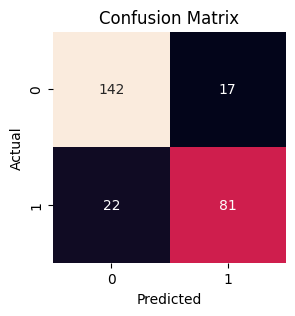

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
titanic_cm = confusion_matrix(y_test, y_pred) # Create the confusion matrix

# Draw the matrix to make it easier to understand
cm_df = pd.DataFrame(titanic_cm) # Create a DataFrame
plt.figure(figsize=(3,3))
sns.heatmap(cm_df, annot=True, fmt='d', cbar=False) # Draw the matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout
plt.show() # Show the matrix

<p style="color: pink">
The confusion matrix shows the number of correct and incorrect predictions made by the model. It is a table with 4 different combinations of predicted and actual values:
<ul style="color: pink">
    <li>True Positive (TP): Corresponds to the number 142 and are the cases where the model predicted positive (no survival) and the actual class is also positive.</li>
    <li>True negative (TN): Corresponds to the number 80 and are the cases where the model predicted negative (survival) and the actual class is also negative.</li>
    <li>False positive (FP): Corresponds to the number 23 and are the cases in which the model predicted positive and the actual class is negative.</li>
    <li>False negative (FN): Corresponds to the number 17 and are the cases where the model predicted negative and the actual class is positive.</li>
</ul>
</p>
<h3 id="step4" style="font-family: Comic Sans MS; color: #68FF33">4. Optimization of the results</h3>
<p style="color: pink">
As we have seen, the base model (with all predefined parameters) of the logistic regression obtains just over 85% accuracy. However, modifying the model parameters could lead to a significant improvement (or worsening) of the results. There are several strategies such as regularized models.
</p>
<h4 style="font-family: Comic Sans MS; color: #68FF33">Hyperparameter optimization</h4>
<p style="color: pink">
Hyperparameter optimization (HPO) is a mechanism for approximating a version of a model with high performance and effectiveness. These hyperparameters, unlike model parameters, are set by the engineer prior to training. A hyperparameter is a configuration variable external to the model that is used to train it. Depending on the model, we can find a multitude of hyperparameters: Learning rate in gradient descent, Number of iterations in gradient descent, Number of layers in a Neural Network...<br>
<br>Normally, we do not know the optimal values for the hyperparameters that would generate the best of the model results. Therefore, it is a vital and important step to include this step in any Machine Learning model building. Our "base" accuracy is 85% so let's see if we can improve the results using the different techniques:
</p>
<h4 style="font-family: Comic Sans MS; color: #68FF33">4.1 Grid search</h4>
<p style="color: pink">The grid search is a method that performs an exhaustive search through a specific (manually set) subset of values and then tries all possible combinations until the best of the models is found.</p>

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'penalty': ['l1', 'l2', 'elasticnet', None], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# Create the GridSearchCV object
grid = GridSearchCV(model, param_grid, scoring= 'accuracy', cv=5) 
grid 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

<ul style="color: pink">
    <li>We import <strong>GridSearchCV</strong> function from sklearn for hyperparameter tuning, which is the process of finding the optimal hyperparameters.</li>
    <li><em>param_grid</em> is dictionary that contains the hyperparameters that we want to tune for our model. The keys of the dictionary are the names of the hyperparameters, and the values are lists of the values we want to try for each hyperparameter. In this case, we are tuning three hyperparameters:</li>
        <ul>
            <li>'C': This is the inverse of regularization strength in models like Logistic Regression and Support Vector Machines. Smaller values specify stronger regularization.</li>
            <li>'penalty': This is used to specify the norm used in the penalization in the algorithm.</li>
            <li>'solver': This is the algorithm to use in the optimization problem.</li>
        </ul>
    <li>The second part of the code creates a <strong>GridSearchCV</strong> object. The parameters passed to this function are:</li>
        <ul>
            <li>model: This is the machine learning model that we want to tune.</li>
            <li>param_grid: This is the dictionary of hyperparameters that we defined earlier.</li>
            <li>scoring: This is the metric to evaluate the models. In this case, we are using accuracy.</li>
            <li>cv: This is the number of cross-validation folds to use. Cross-validation is a technique for assessing how the results of a statistical analysis will generalize to an independent data set.</li>
        </ul>
    <li>The GridSearchCV function will then perform an exhaustive search over the specified parameter values for an estimator (the model), and gives out the best parameters that can be set to the model to achieve the best accuracy, or any other specified scoring metric.</li>
</ul>

In [23]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Train the model
grid.fit(X_train, y_train) # Train the model

# Show the best hyperparameters
print(f"Best hyperparameters: {grid.best_params_}") # Show the best hyperparameters

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


<ol style="color: pink">
    <li>The first part of the code above is a function definition and a couple of lines that suppress warnings. The function warn is defined to do nothing, and then it's set as the new warnings.warn function. This effectively turns off all warnings, which can be useful if we're running code that generates a lot of warnings that we know are safe to ignore.</li>
    <li>Next, the fit method is called on the grid_model object, which is an instance of GridSearchCV. The fit method trains the model using the training data provided (X_train and y_train). During this process, the model will be trained multiple times using different combinations of hyperparameters, and the performance of each model will be evaluated.</li>
    <li>Finally, the best hyperparameters found during the training process are printed. The best_params_ attribute of a GridSearchCV object is a dictionary where the keys are the names of the hyperparameters and the values are the best values found for each hyperparameter. By printing this dictionary, we can see which hyperparameters resulted in the best performing model.</li>
</ol>
<p style="color: pink">
In addition, we must always use the training data set to adjust it. Now we just have to repeat the training by setting these parameters in the model:
</p>

In [25]:
model_grid = LogisticRegression(C=1, penalty='l1', solver='liblinear') # Create the model object with the best hyperparameters
model_grid.fit(X_train, y_train) # Train the model
y_pred = model_grid.predict(X_test) # Predict the target variable
grid_accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model
grid_accuracy # Show the accuracy of the model

0.851145038167939

<p style="color: pink">
We don't observe any improvement after having used three of the many hyperparameters the model accepts. We could build a much more complex grid (and one that would take longer to run) to improve the results.
</p>
<ul style="color: pink">
    <li>Pros</li>
        <ul>
            <li>Exhaustiveness: It tests all possible combinations of hyperparameters within the provided grid, so if the optimal combination is within it, this methodology will find it.</li>
            <li>Reproducibility: Due to its deterministic (non-random) nature, the same result will always be obtained with the same parameters and input.</li>
        </ul>
    <li>Cons</li>
        <ul>
            <li>Efficiency: It is very computationally expensive. It can be time consuming and resource intensive, especially if the number of hyperparameters is large and/or the range of values is wide.</li>
            <li>It does not guarantee the best results, since it depends on the hyperparameters and the values set by the developer.</li>
        </ul>
</ul>

<h4 style="font-family: Comic Sans MS; color: #68FF33">4.2 Random search</h4>
<p style="color: pink">The random search is similar to the previous one but, instead of testing all possible combinations of previously established hyperparameter values, this methodology randomly selects combinations of hyperparameters to test.</p>

In [27]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV  

# Define the hyperparameters
hyperparams = {'C': np.logspace(-4, 4, 20), 
              'penalty': ['l1', 'l2', 'elasticnet', None], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, hyperparams, scoring= 'accuracy', cv=5, n_iter=100, random_state=42)
random_search

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=1, penalty='l1',
                                                solver='liblinear'),
                   n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

<ul style="color: pink">
    <li>'C' is the inverse of regularization strength, smaller values specify stronger regularization. np.logspace(-4, 4, 20) generates 20 numbers evenly spaced over a log scale, which means the sequence starts at 10^-4 and ends with 10^4.</li>
    <li>n_iter: This is the number of parameter settings that are sampled. It's set to 100 in this case.</li>
    <li>random_state: This is the seed used by the random number generator. It's set to 42 in this case.</li>
</ul>

In [28]:
# Train the model with the best hyperparameters
random_search.fit(X_train, y_train) 

print(f"Best hyperparameters: {random_search.best_params_}") # Show the best hyperparameters

Best hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 29.763514416313132}


In [29]:
# Create the model object with the best hyperparameters and retrain the model
model_random_search = LogisticRegression(penalty='l2', C=29.7635, solver='lbfgs')
model_random_search.fit(X_train, y_train) # Train the model
y_pred = model_random_search.predict(X_test) # Predict the target variable
random_search_accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model
random_search_accuracy # Show the accuracy of the model

0.851145038167939

<p style="color: pink">
As we can see, it yields the same level of accuracy as the previous strategy. This means that with the means and hyperparameters that we have tried to optimize we are at a local maximum, that is, we would have to repeat the optimization strategy including other hyperparameters to improve the model results, since only playing with the penalty, C and solver we are not going to improve the model more than it is already.
</p>
<ul style="color: pink">
    <li>Pros</li>
        <ul>
            <li>Efficiency: it is generally faster than grid search, since it does not try all possible combinations, but randomly selects a specific number of them.</li>
            <li>It can be closer to global optimization when selecting random values, since there is no fixed grid of them.</li>
        </ul>
    <li>Cons</li>
        <ul>
            <li>Randomness. It does not guarantee the same solution in each run, unless a seed (random_state) is fixed.</li>
            <li>It is not exhaustive: You may not try the best combination of hyperparameters if you are unlucky with random selection.</li>
        </ul>
</ul>